**TUGAS 1 GDSCITB**

Nama: Aldion Sumampouw

Nim: 1815015193 

Asal Universitas : Universitas Mulawarman

Tanggal mulai pengerjaan tugas : Selasa, 10 November 2020

Sumber Dataset : tips.csv (Seaborn dataset -> https://bit.ly/35je1BO)


#**Library yang digunakan**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

#**Load Dataset & Dataset Information**

In [ ]:
df = pd.read_csv('/content/tips.csv')

**Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


Dikarenakan tidak ada yang memiliki nilai kosong maka tidak dilakukan 
penghapusan kolom ataupun pengisian nilai.

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#**Data Preparation** 
**Delete & Renaming Column**




In [ ]:
df.columns=['Total bill','Tip','Gender','Smoking','Day','Time','Costumer']

**Assign Value to Gender & Smoking Column**

In [ ]:
df['Gender'] = df['Gender'].apply(lambda x:0 if x == 'Female' else 1)
df['Smoking'] = df['Smoking'].apply(lambda x:0 if x == 'No' else 1)

Penggantian nilai bagi kolom gender dan smoking.

In [ ]:
df.head()

,Total bill,Tip,Gender,Smoking,Day,Time,Costumer
0,16.99,1.01,0,0,Sun,Dinner,2
1,10.34,1.66,1,0,Sun,Dinner,3
2,21.01,3.50,1,0,Sun,Dinner,3
3,23.68,3.31,1,0,Sun,Dinner,2
4,24.59,3.61,0,0,Sun,Dinner,4


#**Data Processing**

In [ ]:
#Perhitungan total bill dan total costumer dari dataset
total_bill_sum = df['Total bill'].sum()
total_tips = df['Tip'].sum()

#membagi dataset berdasarkan gender pengunjung
df_costumer_male = df[df['Gender']==1]
df_costumer_female = df[df['Gender']==0]

#nilai tip minimum dan maksimum
Tipmin = df['Tip'].min()
Tipmax = df['Tip'].max()
print("Tip minimum yang diberikan pelanggan ialah sebesar %d$" %(Tipmin))
print("Tip maximum yang diberikan pelanggan ialah sebesar %d$" %(Tipmax))

Tip minimum yang diberikan pelanggan ialah sebesar 1$
Tip maximum yang diberikan pelanggan ialah sebesar 10$


In [ ]:
#Perhitungan rata-rata
average_tip = []
average_tip.append(df['Tip'].mean())
average_tip.append(df_costumer_male['Tip'].mean())
average_tip.append(df_costumer_female['Tip'].mean())

average_costumer = []
average_costumer.append(round(df['Costumer'].mean()))
average_costumer.append(round(df_costumer_male['Costumer'].mean()))
average_costumer.append(round(df_costumer_female['Costumer'].mean()))

average_total_bill = []
average_total_bill.append(df['Total bill'].mean())
average_total_bill.append(df_costumer_male['Total bill'].mean())
average_total_bill.append(df_costumer_female['Total bill'].mean())

costumer = []
costumer.append(df['Costumer'].sum()) 
costumer.append(df_costumer_male['Costumer'].sum())
costumer.append(df_costumer_female['Costumer'].sum())

day_sun = df[df['Day']=='Sun']
day_sat = df[df['Day']=='Sat']
day_fri = df[df['Day']=='Fri']
day_thur = df[df['Day']=='Thur']

day_visitor = []
day_visitor.append((day_sun['Costumer']).sum())
day_visitor.append((day_sat['Costumer']).sum())
day_visitor.append((day_fri['Costumer']).sum())
day_visitor.append((day_thur['Costumer']).sum())

dinner_time = df[df['Time']=='Dinner']
lunch_time = df[df['Time']=='Lunch']

time_visit = []
time_visit.append((dinner_time['Time']).count())
time_visit.append((lunch_time['Time']).count())

# **Chart**

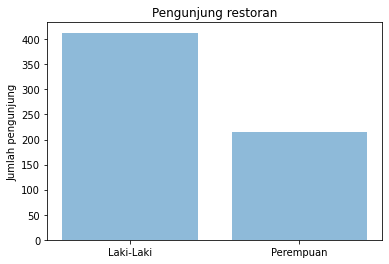

In [ ]:
objects = ('Laki-Laki', 'Perempuan')
y_pos = np.arange(len(objects))
performance = [costumer[1],costumer[2]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Jumlah pengunjung')
plt.title('Pengunjung restoran')
plt.show()

Kebanyakan pengunjung ialah laki-laki

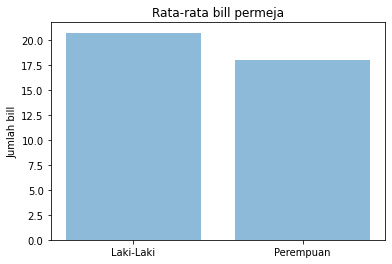

In [ ]:
objects = ('Laki-Laki', 'Perempuan')
y_pos = np.arange(len(objects))
performance = [average_total_bill[1],average_total_bill[2]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Jumlah bill')
plt.title('Rata-rata bill permeja')
plt.show()

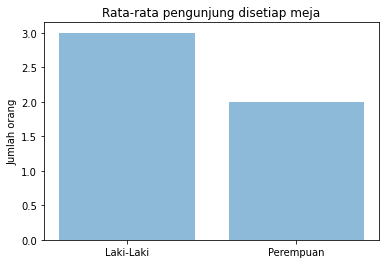

In [ ]:
objects = ('Laki-Laki', 'Perempuan')
y_pos = np.arange(len(objects))
performance = [average_costumer[1],average_costumer[2]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Jumlah orang')
plt.title('Rata-rata pengunjung disetiap meja')
plt.show()

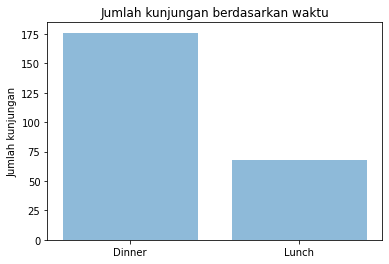

In [ ]:
objects = ('Dinner', 'Lunch')
y_pos = np.arange(len(objects))
performance = [time_visit[0],time_visit[1]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Jumlah kunjungan')
plt.title('Jumlah kunjungan berdasarkan waktu')
plt.show()

Pengunjung lebih memilih makan malam direstoran ini dibandingkan makan siang.

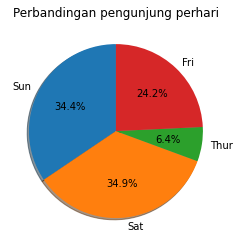

In [ ]:
labels = df['Day'].unique()
sizes = [day_visitor[0],day_visitor[1],day_visitor[2],day_visitor[3]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Perbandingan pengunjung perhari')
plt.show()


Pengunjung pada hari sabtu dan minggu lebih banyak dibandingkan hari jumat dan kamis

#**Korelasi nilai**

Pearson correlation

Nilai Korelasi Pearsons : 0.598


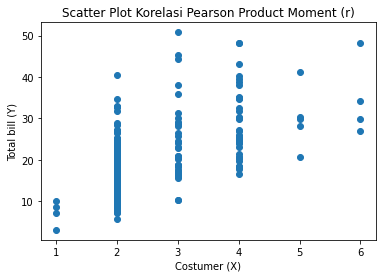

Jumlah pelanggan memiliki korelasi positif yang kuat terhadap total bayar


In [ ]:
corr, _ = pearsonr(df['Costumer'],df['Total bill'])
print('Nilai Korelasi Pearsons : %.3f' % corr)
plt.scatter(df['Costumer'],df['Total bill'])
plt.title('Scatter Plot Korelasi Pearson Product Moment (r)')
plt.xlabel('Costumer (X)')
plt.ylabel('Total bill (Y)')
plt.show()

Jumlah pelanggan memiliki korelasi positif yang kuat terhadap total bayar